In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, linewidth=120)
import sys
sys.path.append("..")
from datasets import *
import pandas as pd
import seaborn as sns

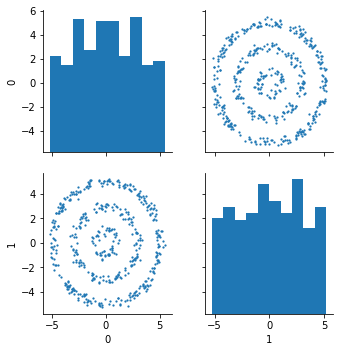

In [4]:
seed = 12
noise_std = 0.0

# funnel, banana, ring, uniform (square, discontinuous), cosine(discontinuous), multiring (MoR)
dname = "multiring"
p = load_data(dname, D=2, noise_std = noise_std, seed=seed, itanh=False, whiten=False )
D = p.D
    
plot_size=8
ngrid = 100

data = p.data[:500,:5]
df = pd.DataFrame(data)
sns.pairplot(df,  plot_kws=dict(s=5, alpha=1.0, linewidth=0))

In [5]:

import matplotlib.pyplot as plt
def plot_dataset(p, plot_size, ngrid, n=500, sample_params=dict(), dlogpdf_params = dict(), quiver_params=dict()):

    eval_grid = np.linspace(-plot_size/2,plot_size/2,ngrid) 

    eval_points = np.array([[xv,yv] + [0.01]*(p.D-2)
        for xv in eval_grid
                for yv in eval_grid])
    #eval_points = np.random.randn(ngrid, D)


    rand_train_data = p.sample(n)

    fig, axes = plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)

    # some useful methods
    logpdf = p.logpdf(eval_points)
    dlogpdf = p.grad_multiple(eval_points)
    
    logpdf = logpdf.reshape(ngrid,ngrid)
    dlogpdf = dlogpdf.reshape(ngrid,ngrid,-1)
    logpdf -= logpdf.max()+20
    pdf    = np.exp(logpdf)
    pdf /= pdf.sum()

    ax = axes[0]

    ax.scatter(rand_train_data[:,0],rand_train_data[:,1], 2, "r", **sample_params)
    ax.set_xlim([-plot_size/2,plot_size/2])
    ax.set_ylim([-plot_size/2,plot_size/2])
    ax.set_aspect("equal")
    
    ax.pcolor(eval_grid, eval_grid, pdf.T,  zorder=0)
    ax.set_title("pdf")
    ax = axes[1]

    g_int = 10

    ax.pcolor(eval_grid, eval_grid, logpdf.T, **dlogpdf_params)
    if quiver_params is not None:
        ax.quiver(eval_grid[::g_int], eval_grid[::g_int], dlogpdf[::g_int,::g_int,0].T, 
                   dlogpdf[::g_int,::g_int,1].T, **quiver_params)
    ax.scatter(rand_train_data[:,0],rand_train_data[:,1], 2, "r", **sample_params)
    ax.set_title("logpdf")
    ax.set_xlim([-plot_size/2,plot_size/2])
    ax.set_ylim([-plot_size/2,plot_size/2])
    ax.set_aspect("equal")

    return fig, axes, rand_train_data, eval_grid, eval_points

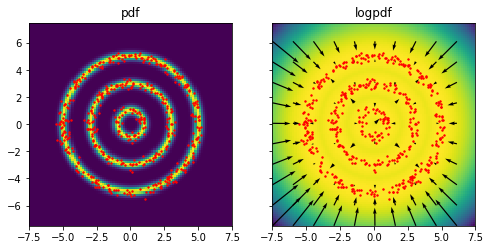

In [6]:
fig, axes = plot_dataset(p.dist, 15, 100)[:2];